In [ ]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Data

In [ ]:
data_train = pd.read_csv("data/training_set.csv")
data_test = pd.read_csv("data/testing_set.csv")

X_train, X_val, y_train, y_val = train_test_split(data_train.iloc[:,:-1], data_train.iloc[:,-1], test_size = 0.2, random_state = 42)
X_test, y_test= data_test.iloc[:,:-1], data_test.iloc[:,-1]

# Neural network


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def create_model(optimizer="adam", activation="relu"):
  model = Sequential()
  model.add(Dense(20,activation=activation))
  model.add(Dense(20,activation=activation)) 
  model.add(Dense(20,activation=activation))
  model.add(Dense(20,activation=activation))
  model.add(Dense(20,activation=activation))
  model.add(Dense(1))
  model.compile(optimizer=optimizer,loss="mse")

  return model

model = KerasRegressor(build_fn=create_model, verbose=1)
cv = KFold(n_splits=5, shuffle=True, random_state=1)
batches = [10]
optimizer = ['adam','Adagrad']
activationFunction = ['relu','selu']
epochs = [100, 1000, 2000]
param_grid = dict(batch_size = batches,
                  optimizer=optimizer,
                  activation=activationFunction,
                  epochs = epochs)
search = GridSearchCV(model, param_grid=param_grid, return_train_score=True, cv=cv)
grid_result = search.fit(X_train.to_numpy(), y_train.to_numpy())

In [ ]:
print("===========RESULTS============")
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean_accuracy, stdev, param in zip(means, stds, params):
    print(f'mean={mean_accuracy:.4}, std={stdev:.4} using {param}')

In [ ]:
model = create_model()
hist = model.fit(X_train, y_train, batch_size=10, epochs=1000, validation_data=(X_val, y_val))

Epoch 1/1000
70/70 [==============================] - 2s 8ms/step - loss: 1113694079549440.0000 - val_loss: 962763090296832.0000
Epoch 2/1000
70/70 [==============================] - 0s 2ms/step - loss: 1113485706526720.0000 - val_loss: 962607397732352.0000
Epoch 3/1000
70/70 [==============================] - 0s 2ms/step - loss: 1110668946178048.0000 - val_loss: 960840085798912.0000
Epoch 4/1000
70/70 [==============================] - 0s 2ms/step - loss: 1088967483064320.0000 - val_loss: 949309709221888.0000
Epoch 5/1000
70/70 [==============================] - 0s 2ms/step - loss: 990075793965056.0000 - val_loss: 903179210326016.0000
Epoch 6/1000
70/70 [==============================] - 0s 2ms/step - loss: 747842188607488.0000 - val_loss: 795014082854912.0000
Epoch 7/1000
70/70 [==============================] - 0s 2ms/step - loss: 552319204720640.0000 - val_loss: 717288529461248.0000
Epoch 8/1000
70/70 [==============================] - 0s 2ms/step - loss: 530291122765824.0000 - val

In [ ]:
pred = model.predict(X_test)
print(r2_score(pred, y_test.to_numpy().reshape(132, 1)))

5/5 [==============================] - 0s 2ms/step
0.6565258262971853


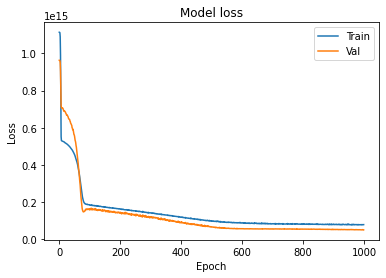

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()